- Carica il dataset "Diabetes" utilizzando sklearn.datasets.load_diabetes().
- Esplora i dati per comprendere le caratteristiche disponibili e la variabiletarget.
- Suddividi il dataset in set di training e test.
- Crea un modello di regressione lineare utilizzando LinearRegression di scikit-learn.
- Addestra il modello sui dati di training.
- Valuta le prestazioni del modello sui dati di test utilizzando metriche appropriate come l'Errore Quadratico Medio (MSE)e il Coefficiente di
- Determinazione (R²).
- Analizza i risultati e discuti l'efficacia del modello.

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

In [146]:
diabetes = load_diabetes()
x = diabetes.data
y = diabetes.target
feature_names = diabetes.feature_names

random_state = 42
test_size = 0.2

In [147]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [148]:
diabetes_not_scaled = load_diabetes(scaled=False)
df = pd.DataFrame(diabetes_not_scaled.data, columns=feature_names)
df['target'] = diabetes_not_scaled.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


In [149]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


array([[<Axes: title={'center': 'age'}>]], dtype=object)

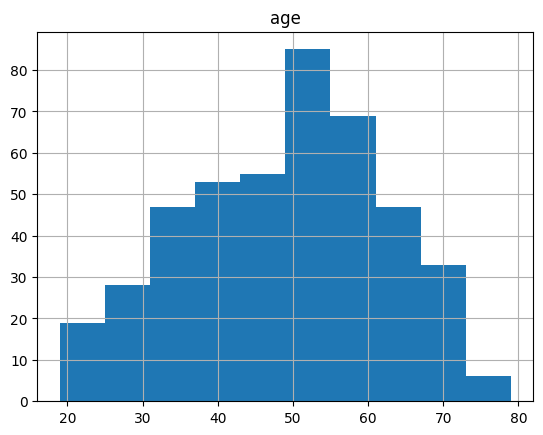

In [150]:
df[['age']].hist()

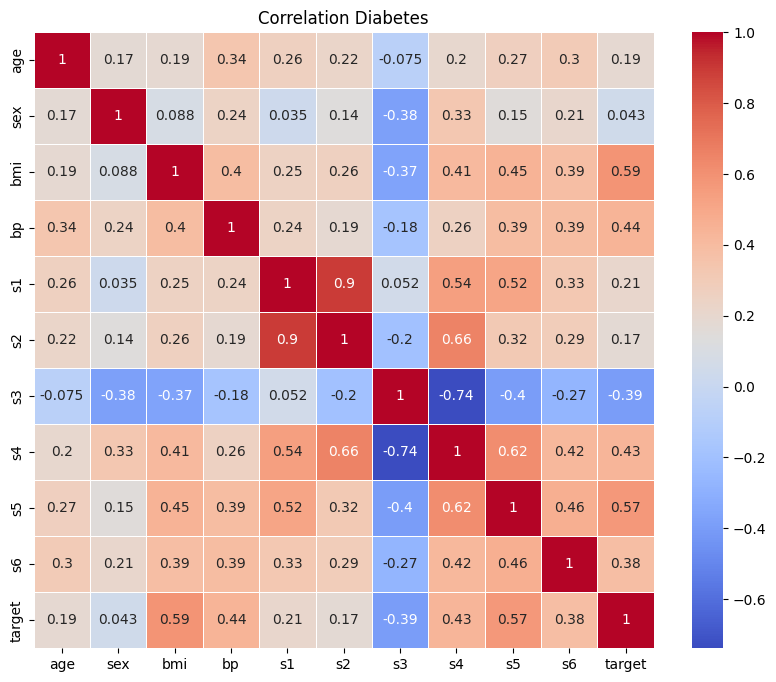

In [151]:
corr = df.corr()
# Plotting Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.7)
plt.title('Correlation Diabetes')
plt.show()

In [152]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=test_size, random_state=random_state)

In [153]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([139.5475584 , 179.51720835, 134.03875572, 291.41702925,
       123.78965872,  92.1723465 , 258.23238899, 181.33732057,
        90.22411311, 108.63375858,  94.13865744, 168.43486358,
        53.5047888 , 206.63081659, 100.12925869, 130.66657085,
       219.53071499, 250.7803234 , 196.3688346 , 218.57511815,
       207.35050182,  88.48340941,  70.43285917, 188.95914235,
       154.8868162 , 159.36170122, 188.31263363, 180.39094033,
        47.99046561, 108.97453871, 174.77897633,  86.36406656,
       132.95761215, 184.53819483, 173.83220911, 190.35858492,
       124.4156176 , 119.65110656, 147.95168682,  59.05405241,
        71.62331856, 107.68284704, 165.45365458, 155.00975931,
       171.04799096,  61.45761356,  71.66672581, 114.96732206,
        51.57975523, 167.57599528, 152.52291955,  62.95568515,
       103.49741722, 109.20751489, 175.64118426, 154.60296242,
        94.41704366, 210.74209145, 120.2566205 ,  77.61585399,
       187.93203995, 206.49337474, 140.63167076, 105.59

In [154]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#Stampa dei risultati
print("Prestazioni del modello:")
print(f"Errore Quadratico Medio (MSE): {mse:.2f}")
print(f"Coefficiente di Determinazione (R²): {r2:.2f}")

Prestazioni del modello:
Errore Quadratico Medio (MSE): 2900.19
Coefficiente di Determinazione (R²): 0.45


##### Un valore così alto di MSE unito a un valore molto basso di r^2 può significare che i nostri dati non seguando un andamento lineare rispetto al target e quindi questo modello potrebbe non essere adatto.

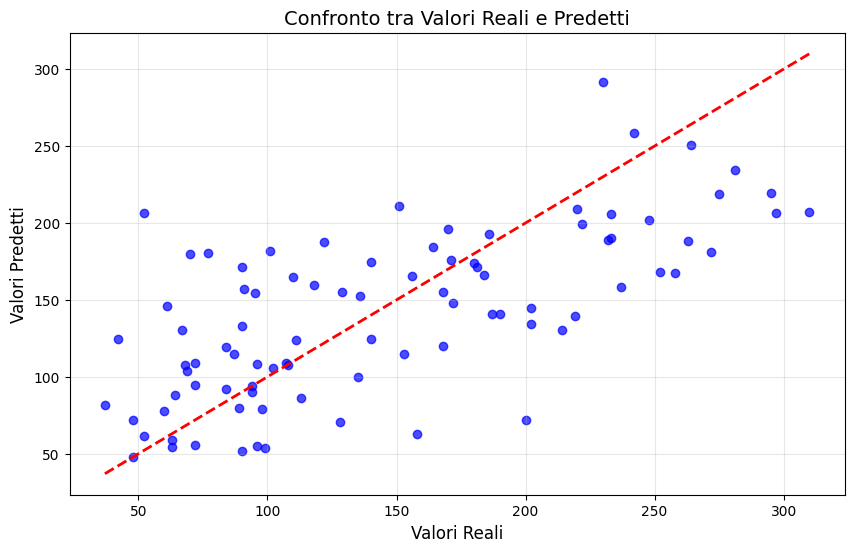

In [158]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title("Confronto tra Valori Reali e Predetti", fontsize=14)
plt.xlabel("Valori Reali", fontsize=12)
plt.ylabel("Valori Predetti", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

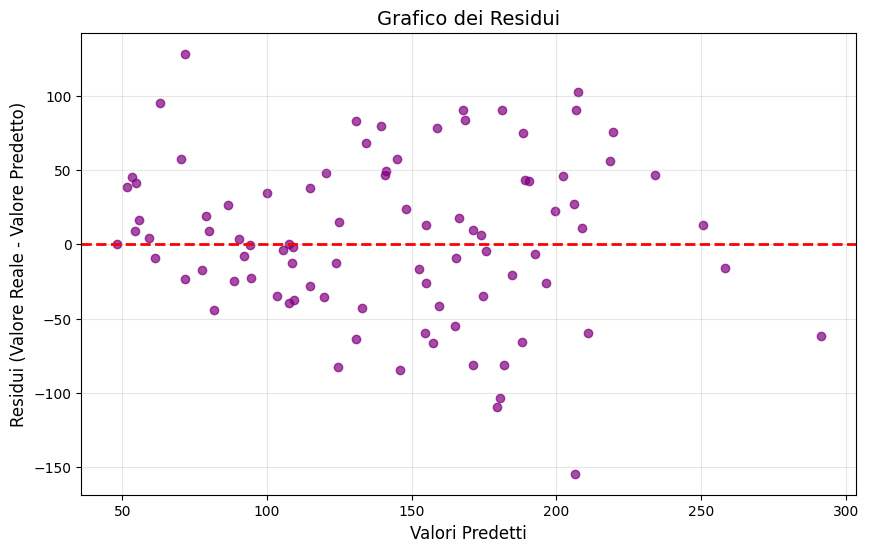

In [156]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color="purple")
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("Grafico dei Residui", fontsize=14)
plt.xlabel("Valori Predetti", fontsize=12)
plt.ylabel("Residui (Valore Reale - Valore Predetto)", fontsize=12)
plt.grid(alpha=0.3)
plt.show()